In [13]:
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
import numpy as np
import random
%matplotlib inline

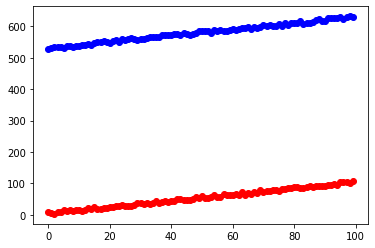

In [14]:
def gen_data(numPoints, bias, variance):
    x = np.zeros(shape=(numPoints, 3))
    y = np.zeros(shape=numPoints)
    # basically a straight line
    for i in range(0, numPoints):
        # bias feature
        x[i][0] = random.uniform(0, 1) * variance + i
        x[i][1] = random.uniform(0, 1) * variance + i
        x[i][2] = 1
        # our target variable
        y[i] = (i+bias) + random.uniform(0, 1) * variance + 500
    return x, y

# gen 100 points with a bias of 25 and 10 variance as a bit of noise
x, y = gen_data(100, 25, 10)

plt.plot(x[:, 0:1], "ro")
plt.plot(y, "bo")

plt.show()

In [15]:
x

array([[  9.9807531 ,   0.22391353,   1.        ],
       [  6.06071705,   9.19297847,   1.        ],
       [  2.79469982,   7.34975271,   1.        ],
       [  7.65060669,   8.80276164,   1.        ],
       [  8.00686995,  10.86533137,   1.        ],
       [ 14.64651855,  14.72017963,   1.        ],
       [ 10.95561872,  11.0093755 ,   1.        ],
       [ 15.31685282,  10.34683132,   1.        ],
       [ 11.71938683,  17.00235502,   1.        ],
       [ 13.92286841,  17.65427922,   1.        ],
       [ 16.62897371,  10.58034745,   1.        ],
       [ 13.228241  ,  14.84781494,   1.        ],
       [ 13.67147356,  15.03829502,   1.        ],
       [ 22.41572343,  17.92951959,   1.        ],
       [ 19.44081657,  17.81968126,   1.        ],
       [ 24.61973707,  15.63969214,   1.        ],
       [ 19.15288192,  21.75425166,   1.        ],
       [ 17.9971211 ,  25.5828028 ,   1.        ],
       [ 22.60302756,  23.57119083,   1.        ],
       [ 22.33251825,  22.89261

In [16]:
y

array([529.21309286, 529.42020056, 532.51712949, 532.56602591,
       535.57350898, 530.794815  , 537.00088654, 535.90469361,
       534.99435602, 538.13076548, 537.01976694, 541.80669906,
       540.85825549, 543.83282537, 540.54750946, 546.63266788,
       550.17975968, 551.56334815, 552.82699504, 551.56561669,
       545.56843606, 552.22602963, 555.86737323, 548.81913411,
       558.82120783, 556.98559989, 560.83370238, 561.90737051,
       559.58437619, 556.42570723, 559.82103932, 560.76710729,
       563.74013687, 566.86464615, 566.84283855, 567.31475152,
       566.39781672, 571.66814745, 571.50446714, 572.69649719,
       572.67898639, 574.95937068, 575.99811928, 572.44328308,
       577.71931095, 577.03434475, 571.53555074, 575.18025208,
       578.17395918, 583.74312084, 584.841026  , 584.4857127 ,
       585.43935259, 578.64415744, 587.33149944, 583.88982626,
       586.82942316, 586.0288101 , 584.82695583, 586.67298068,
       590.28031994, 586.73454355, 592.72468784, 595.32

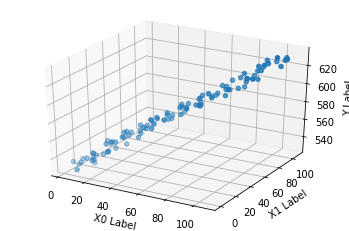

In [17]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[:,0], x[:,1], y)

ax.set_xlabel('X0 Label')
ax.set_ylabel('X1 Label')
ax.set_zlabel('Y Label')

plt.show()

In [18]:
def compute_cost(x, y, theta):
    '''
    Comput cost for linear regression
    '''
    #Number of training samples
    m = y.size
    predictions = x.dot(theta)
    sqErrors = (predictions - y)

    J = (1.0 / (2 * m)) * sqErrors.T.dot(sqErrors)
    return J                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

In [41]:
m = y.size
prediction = x.dot(theta)
prediction

print(prediction - y)
print(x)
print(((prediction - y).reshape(-1, 1) * x).sum(axis=0))

[-0.3012656   2.45588643 -3.15154064 -0.15611862 -1.89460509  8.04536103
 -1.86800745  0.91055008  3.6989767   1.94003534  0.53303064 -3.56057999
 -2.30333203  0.35100555  2.18841741 -2.64375714 -5.47489933 -5.35147815
 -5.53970714 -4.76740724  3.31968334 -3.44500844 -2.79546411  5.29146465
 -3.69238565 -4.82825591 -5.79861279 -8.68364075 -2.38420739  2.82750193
  0.94379983  0.38219501 -0.09706166 -5.36891272 -2.56452199 -2.60946523
 -4.51593122 -5.19198157 -5.47207951 -6.68065049 -3.38148247 -6.14878131
 -5.65622224  3.33395348 -3.44248263 -3.34462795  2.80323336  1.45301774
  1.07096141 -4.15015222 -3.26962728 -3.90911243 -4.14528246  3.48719674
 -1.08767979 -1.56560662 -2.8897322   3.0844965   3.75035128  3.22436706
 -1.10128711  1.11024261 -3.79106103 -2.32949449 -4.42263915 -7.32615073
  4.59656678  0.17640557  3.33090741  2.68120006 -4.06535297 -0.23876874
 -1.47019114  3.16077625  1.47825917 -2.73087216  3.6464386  -2.7575982
  5.98749964  0.90994049  2.29875304 -1.57895101 -6.

In [19]:
def minimize_gradient(x, y, theta, iterations=100000, alpha=0.01):
    
    m = y.size
    cost_history = []
    theta_history = []
    
    for _ in range(iterations):        
        predictions = x.dot(theta)
        
        for i in range(theta.size):
            partial_marginal = x[:, i]
            errors_xi = (predictions - y) * partial_marginal
            theta[i] = theta[i] - alpha * (1.0 / m) * errors_xi.sum()
        
        if _ % 1000 == 0:
            theta_history.append(theta)
            cost_history.append(compute_cost(x, y, theta))

    return theta, np.array(cost_history), np.array(theta_history)

In [10]:
theta_initial = np.ones(3)

theta, cost_history, theta_history = minimize_gradient(
        x, y,theta_initial, 300000, 0.0001)
print("theta", theta)

theta [4.66967681e-01 5.34591946e-01 5.24131436e+02]


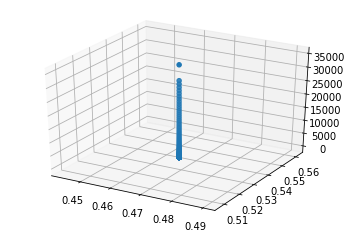

In [11]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter3D(theta_history[:,0],theta_history[:,1], cost_history, zdir="z")


plt.show()

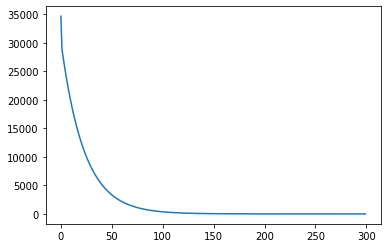

In [12]:
plt.plot(cost_history)
plt.show()